In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [8]:
df=pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [9]:
df.shape

(908, 13)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [13]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean()) 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [20]:
### converting categorical columns into numerical
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df['sex'] = df['sex'].astype(str)
df['sex'] = LabelEncoder().fit_transform(df['sex'])

df['cp'] = df['cp'].astype(str)
df['cp'] = LabelEncoder().fit_transform(df['cp'])

df['fbs'] = df['fbs'].astype(str)
df['fbs'] = LabelEncoder().fit_transform(df['fbs'])

df['restecg'] = df['restecg'].astype(str)
df['restecg'] = LabelEncoder().fit_transform(df['restecg'])

df['exang'] = df['exang'].astype(str)
df['exang'] = LabelEncoder().fit_transform(df['exang'])

df['slope'] = df['slope'].astype(str)
df['slope'] = LabelEncoder().fit_transform(df['slope'])

df['thal'] = df['thal'].astype(str)
df['thal'] = LabelEncoder().fit_transform(df['thal'])

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,1,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,1,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,1,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,3,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1,1.500000,2,1,4
904,62,1,0,166,170,0,2,120,3,3.000000,1,2,4
905,56,1,2,170,0,0,0,123,3,2.500000,0,2,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,2,4


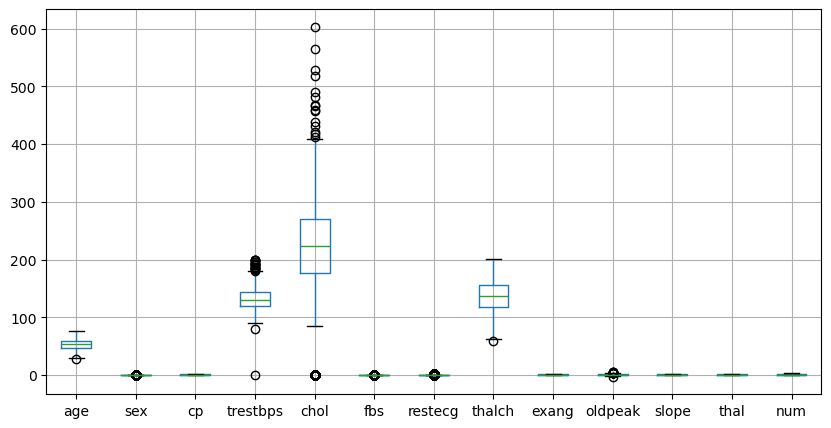

In [43]:
df.boxplot(figsize=(10,5))
plt.show()

In [45]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

In [46]:
df.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,NaN,-0.067587,0.262066,-0.092411,NaN,NaN,-0.328068,0.154950,0.236076,-0.054596,0.029678,0.326493
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,-0.067587,NaN,1.000000,0.012528,0.061485,NaN,NaN,0.248206,-0.358294,-0.170391,0.092177,-0.065993,-0.312848
trestbps,0.262066,NaN,0.012528,1.000000,0.126479,NaN,NaN,-0.131777,0.104120,0.158682,0.009184,0.038777,0.142645
chol,-0.092411,NaN,0.061485,0.126479,1.000000,NaN,NaN,0.194575,-0.029156,0.030557,0.048489,-0.036716,-0.228308
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,-0.328068,NaN,0.248206,-0.131777,0.194575,NaN,NaN,1.000000,-0.309552,-0.131976,0.224065,-0.063651,-0.323060
exang,0.154950,NaN,-0.358294,0.104120,-0.029156,NaN,NaN,-0.309552,1.000000,0.377275,-0.162736,0.091684,0.341811
oldpeak,0.236076,NaN,-0.170391,0.158682,0.030557,NaN,NaN,-0.131976,0.377275,1.000000,-0.179202,0.033569,0.416884


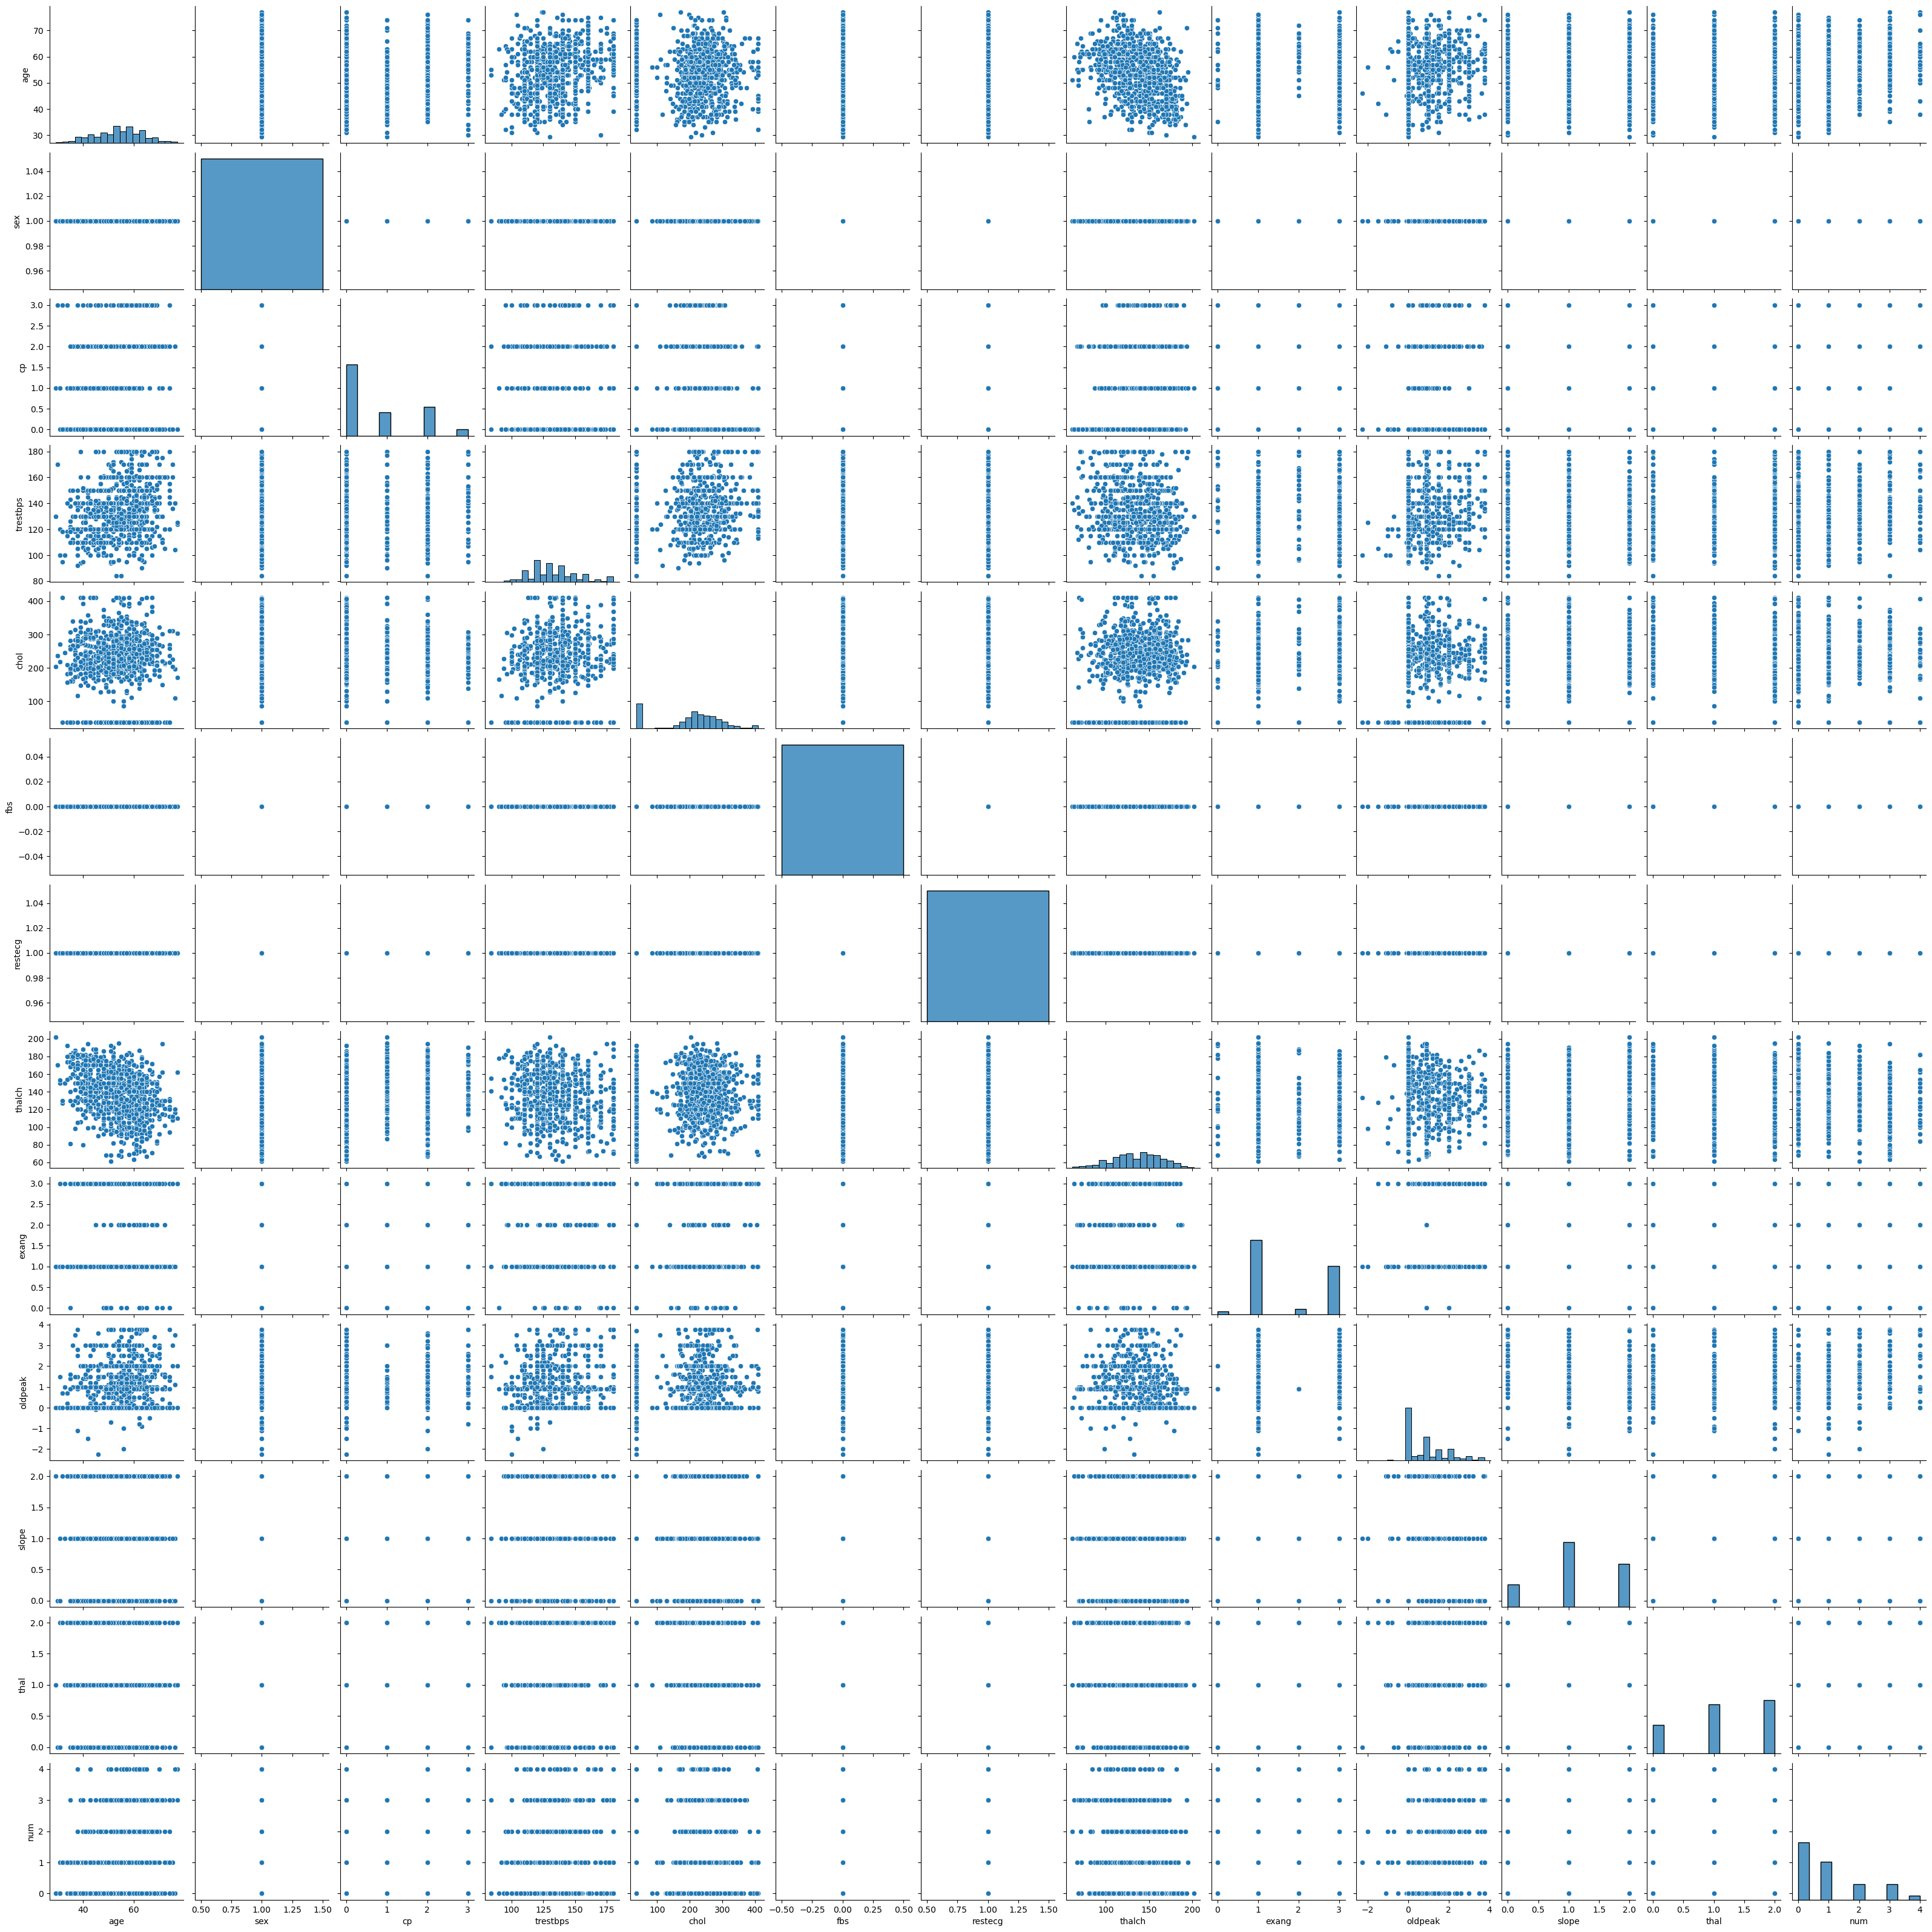

In [47]:
import seaborn as sns
sns.pairplot(df)
plt.show()

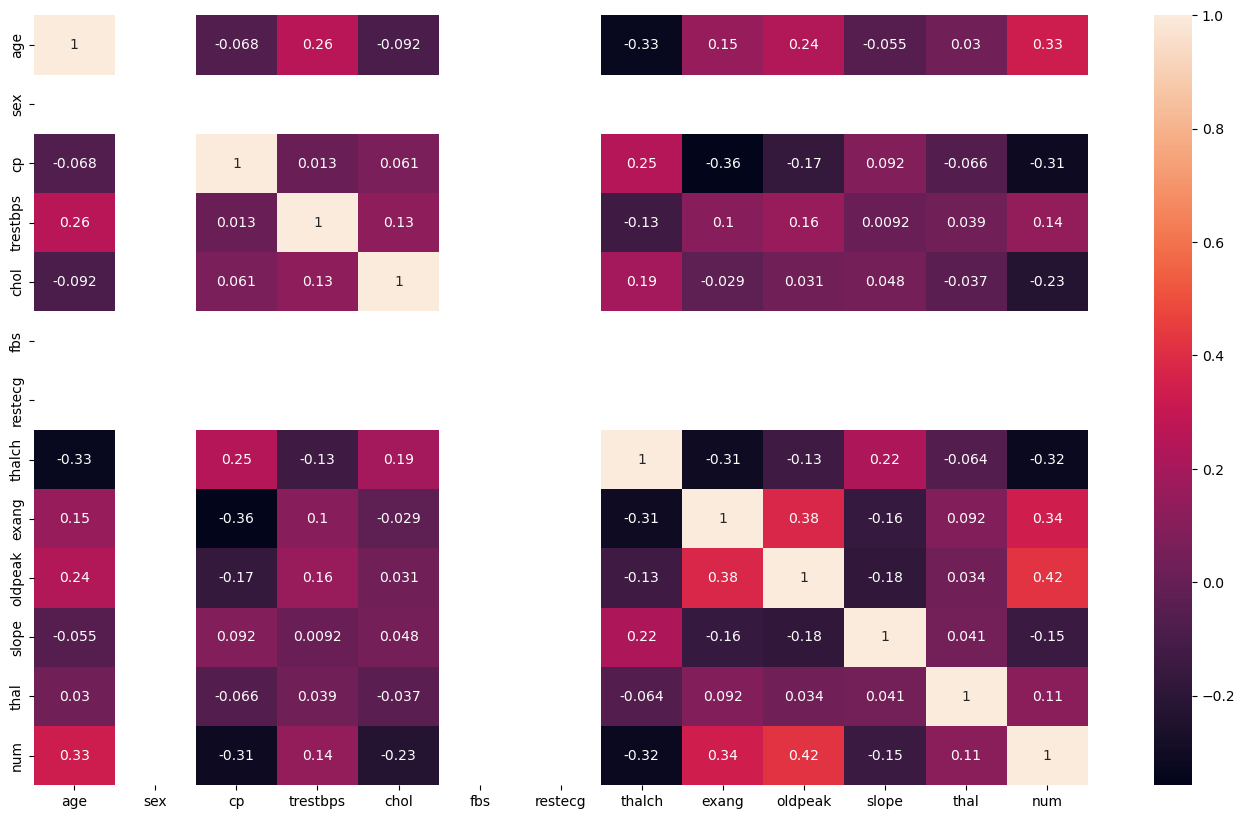

In [49]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

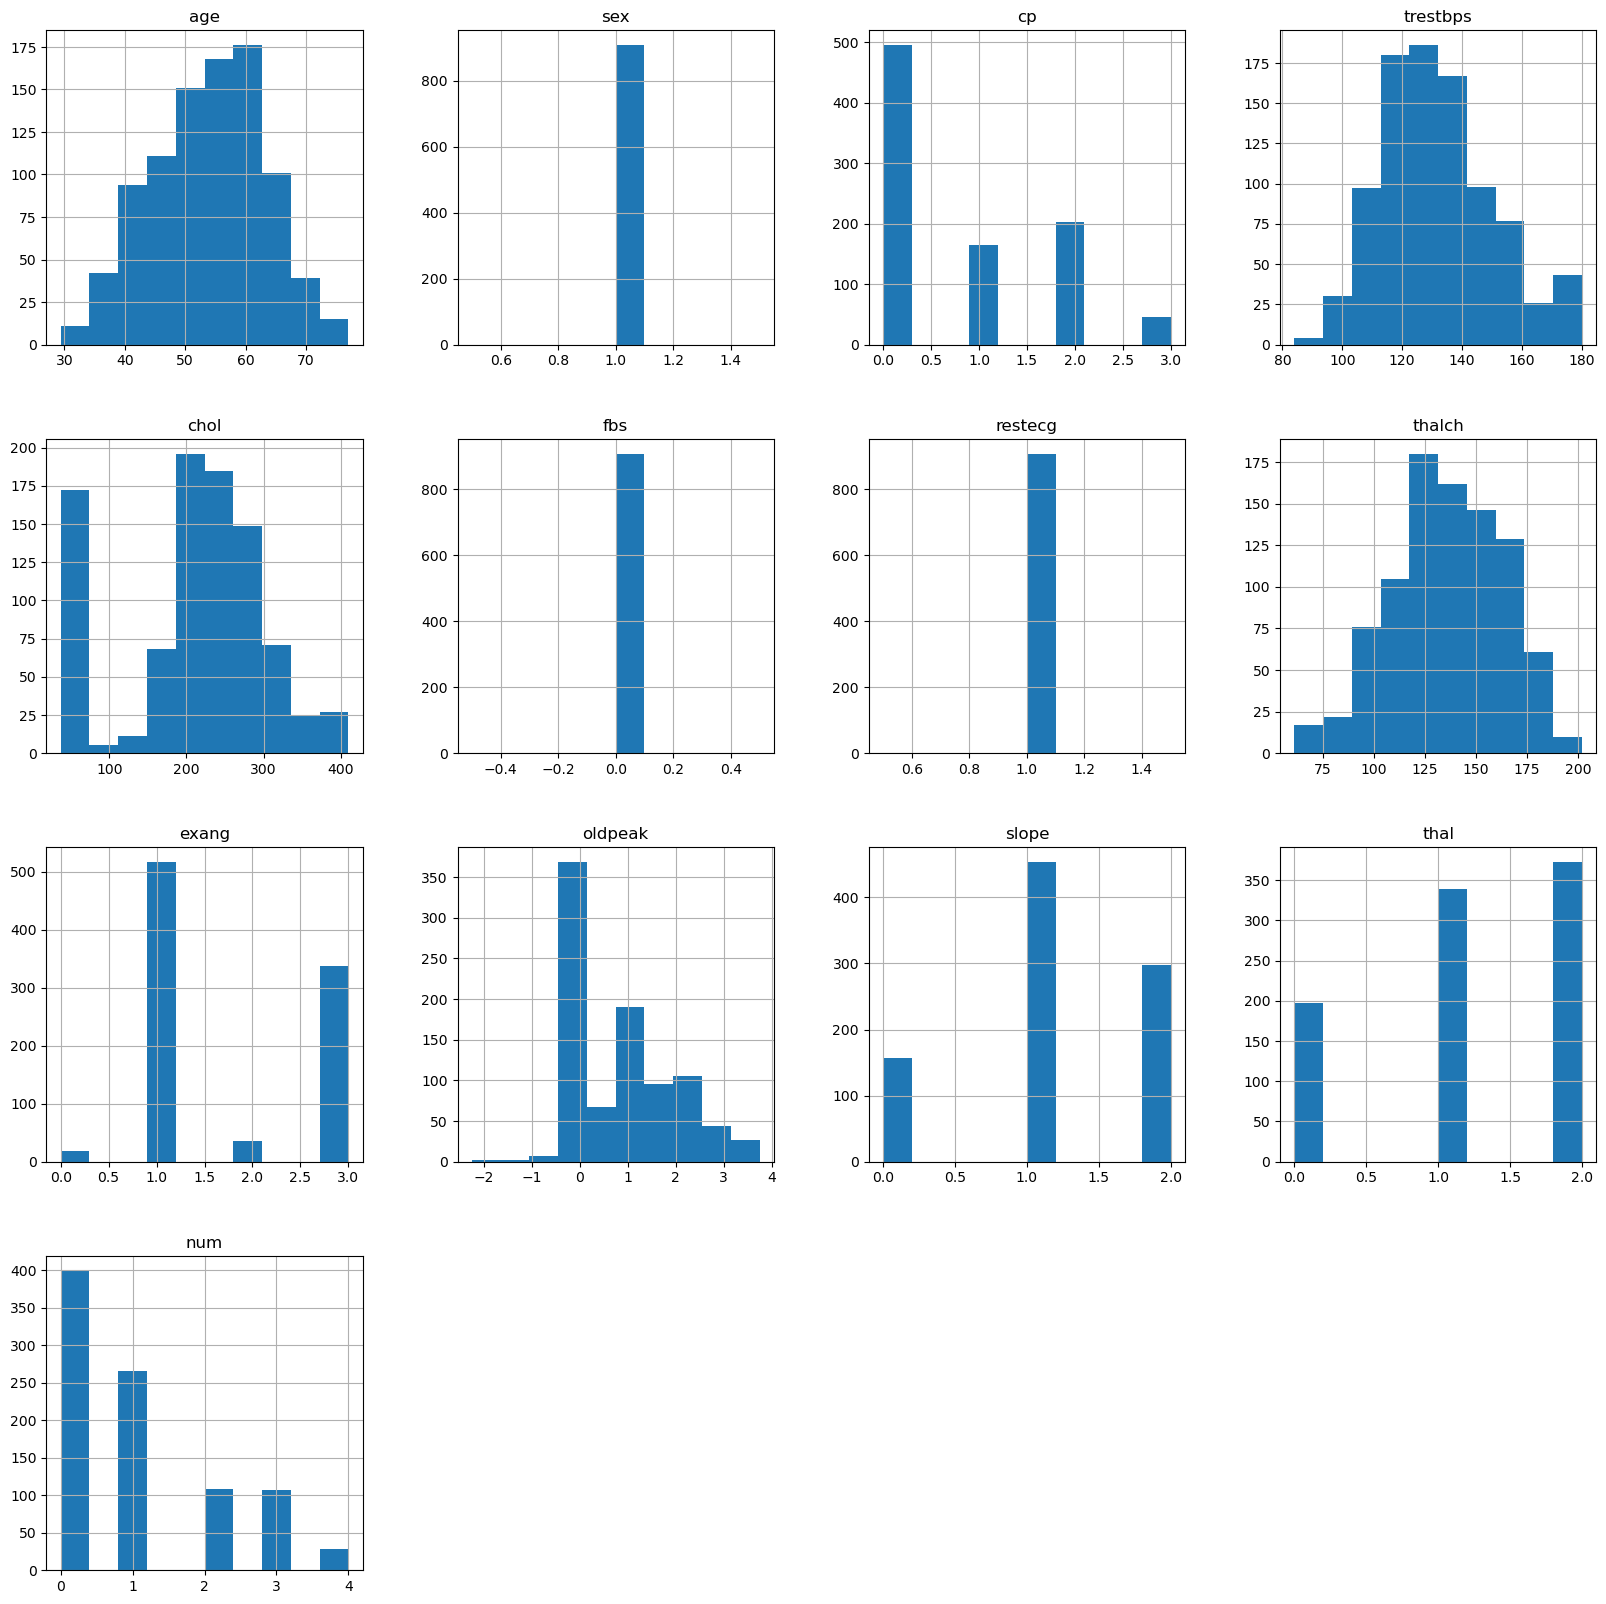

In [50]:
df.hist(figsize=(20,20))
plt.show()

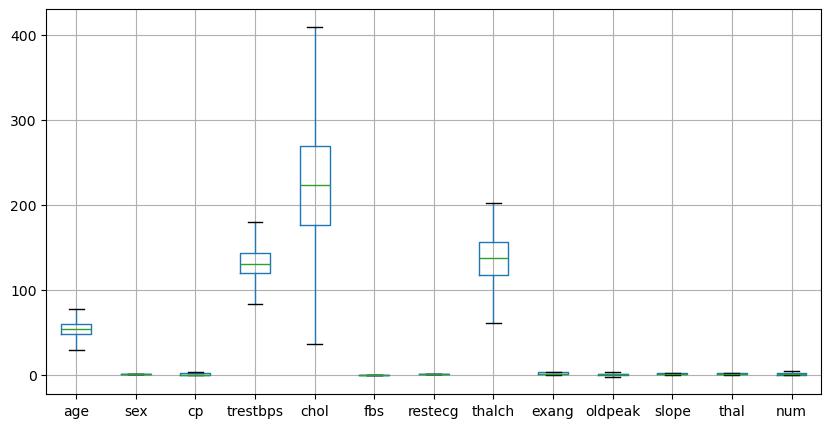

In [51]:
df.boxplot(figsize=(10,5))
plt.show()

In [52]:
target=df[['num']]
features=df.drop(columns=['num'])

In [53]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(681, 12)
(227, 12)
(681, 1)
(227, 1)


In [54]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=3)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5726872246696035

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
y_pred_test=dec_tree.predict(x_test)       
y_pred_test

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0])

In [61]:
print(confusion_matrix(y_test,y_pred_test))

[[94  9  4  0  0]
 [24 33  7  0  0]
 [ 7 15  3  0  0]
 [ 4 18  5  0  0]
 [ 2  2  0  0  0]]


In [62]:
print(classification_report(y_test,y_pred_test)) 

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       107
           1       0.43      0.52      0.47        64
           2       0.16      0.12      0.14        25
           3       0.00      0.00      0.00        27
           4       0.00      0.00      0.00         4

    accuracy                           0.57       227
   macro avg       0.26      0.30      0.28       227
weighted avg       0.48      0.57      0.52       227



In [63]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7)}

In [64]:
grid_search=GridSearchCV(estimator=dec_tree,param_grid=params,cv=5)

In [65]:
grid_search.fit(x_train,y_train)

,estimator,DecisionTreeC...tter='random')
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 7), 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [66]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}

In [67]:
### model building
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dec_tree.fit(x_train,y_train)
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.5242290748898678

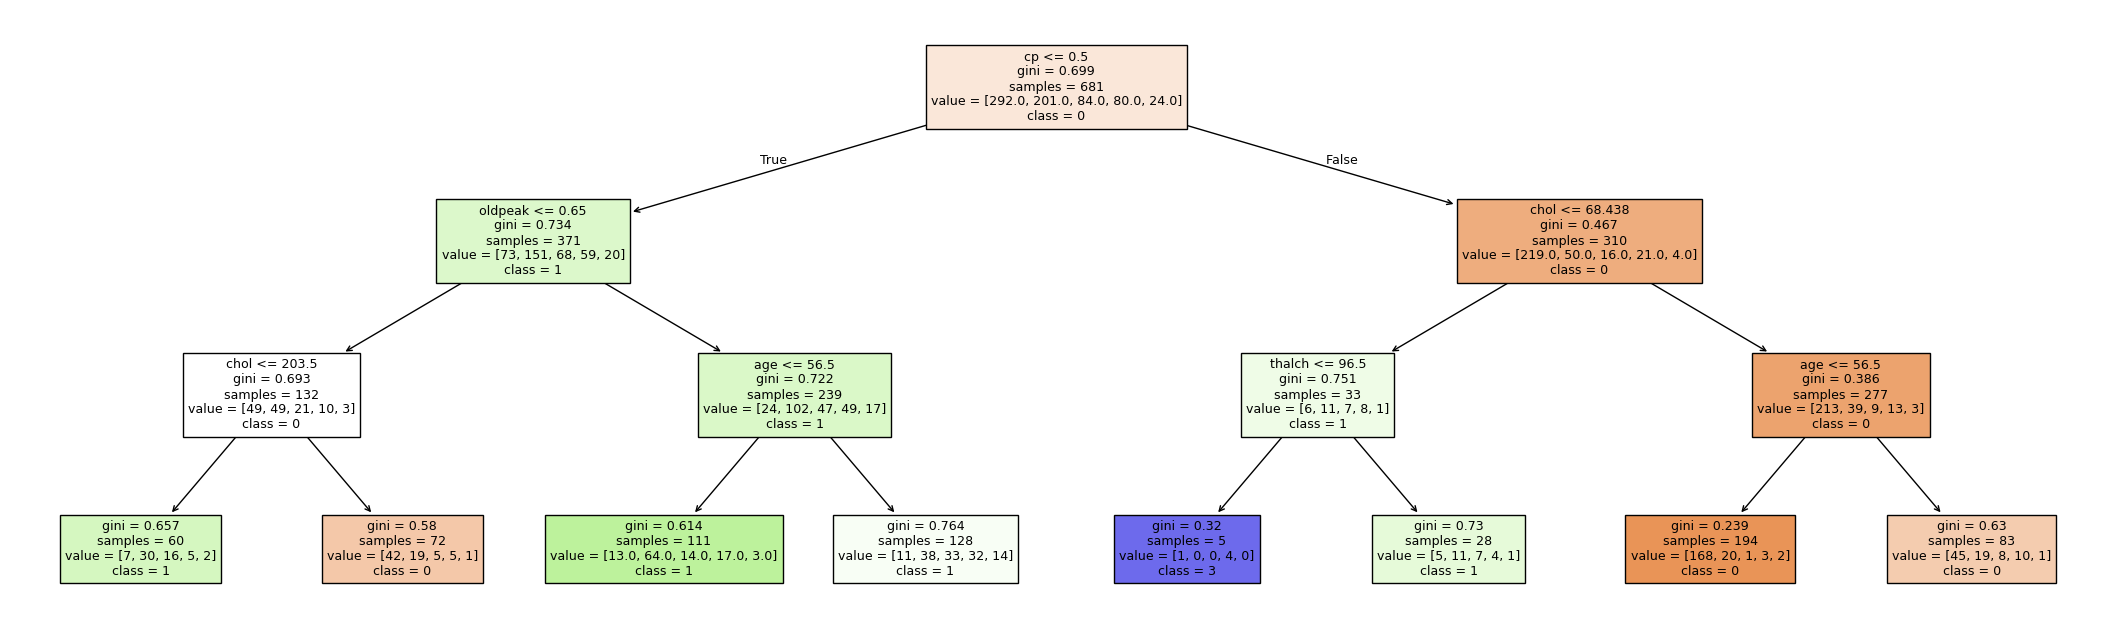

In [71]:
plt.figure(figsize=(27,8))
class_names = [str(x) for x in target.num.unique()]
plot_tree(dec_tree, filled=True, feature_names=list(features), class_names=class_names)
plt.show();

In [72]:
# the accuracy of the model in predicting the hear disease prone people is 52% which is very low.

In [78]:
### it may be because dataset is imbalanced or some features have low predictive power

In [83]:
### each node shows the decision rule used to split the data
### from the visualization oldpeak,cp,chol,thalach  are the key features influencing heart disease prediction

In [82]:
feature_names = features.columns.tolist()
pd.DataFrame({
    'Feature':feature_names,
    'Importance': dec_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

,Feature,Importance
2,cp,0.542822
4,chol,0.218198
0,age,0.137263
9,oldpeak,0.076196
7,thalch,0.025521
1,sex,0.000000
3,trestbps,0.000000
5,fbs,0.000000
6,restecg,0.000000
8,exang,0.000000


In [84]:
### cp-ches pain type is the most important feature

In [85]:
### hyperparameters of decision tree models and its effect
### criterion--measures split quality ('gini' or 'entropy')
### max_depth--Limits tree depth; small → underfit, large → overfit
### splitter--'best' or 'random' split; affects accuracy

In [86]:
### diff b/w label encoding and one hot encoding
### Label Encoding converts each category into a unique integer and is suitable for ordinal data where the order matters.
### One-Hot Encoding creates separate binary columns for each category and is preferred for nominal data with no natural order, avoiding any misleading numeric relationships.
